## Data exploration

### Part I

**1**: Print the class distribution, i.e., the proportion of images in each category. 

In [1]:
import numpy as np
import os
import pandas as pd

# Load the numpy .npz file
with np.load(os.path.join('data', 'cifar4-train.npz'), allow_pickle=False) as data:
    cifar4_data = dict(data.items())
    
print('Data loaded')
print('It is a dictionary with keys:', list(cifar4_data.keys()))

Data loaded
It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [2]:
# Create X/y arrays
X = cifar4_data['pixels']
y = cifar4_data['labels']

# Change the type of X input matrix to float 64
X = X.astype(np.float)

print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (5000, 3072) float64
y: (5000,) int64


In [3]:
# compute distribution using pandas
pd.value_counts(y)/len(y)

3    0.25
2    0.25
1    0.25
0    0.25
dtype: float64

In [4]:
# trucks = 0
# cars = 1
# airplanes = 2
# ships = 3

The proportion of images in each category (truck, cars, airplanes and ships) is 25%.

**2**: What is the accuracy of the "most-frequent" baseline?

In [5]:
from sklearn.model_selection import train_test_split

# Split data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=4000, test_size=1000, random_state=0)

In [6]:
from sklearn.dummy import DummyClassifier

# Create the dummy classifier
dummy = DummyClassifier(strategy = 'most_frequent')

# Fit it
dummy.fit(X_tr, y_tr)

# Compute test accuracy
accuracy = dummy.score(X_te, y_te)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.23


The accuracy of the "most-frequent" baseline is 23%.

**3**: Plot a few images from the data set.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# Function to plot the i-th image from some X/y arrays
def show_image(idx, X, y):
    # Get image pixels from the input matrix X
    flat_img = X[idx] # has shape (784,)
    
    # Reshape image into a 28x28 array 
    img = flat_img.reshape(32, 32, 3)
    
    # Print label using the output vector y
    print('Label:', y[idx])
    
    # Plot image with pyplot
    plt.imshow(img/255)
    plt.show()

Label: 3


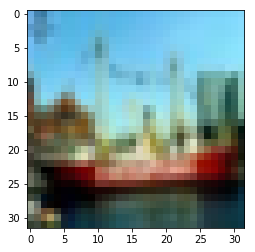

Label: 2


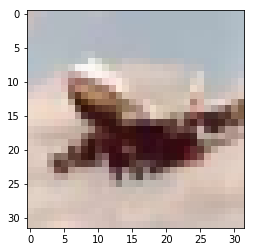

Label: 1


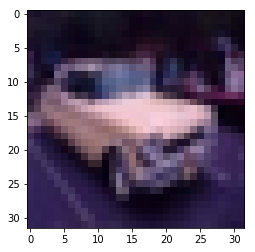

Label: 2


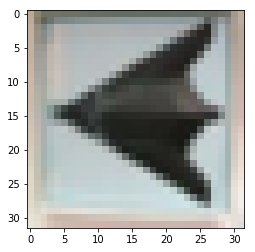

Label: 2


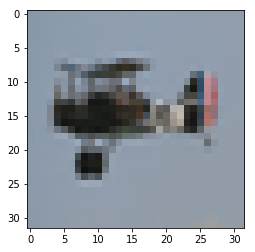

In [9]:
# Show the first 5 images from the training set
for image in range(0,5):
    show_image(image, X_tr, y_tr)

### Part II

**1**: Scree plot from high-level OverFeat features

In [12]:
X_features = cifar4_data['overfeat']

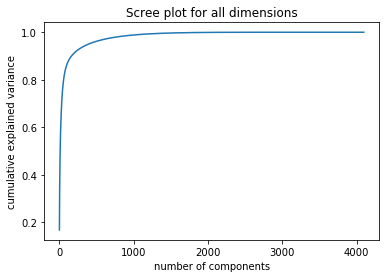

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_features)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.title('Scree plot for all dimensions')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**2:** Cumulative PVE of the first two components

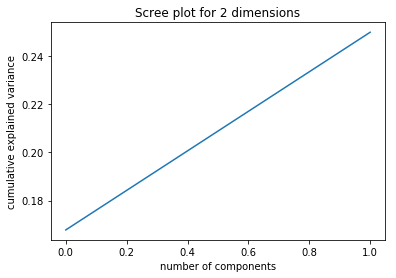

In [20]:
pca_2d = PCA(n_components=2)
pca_2d.fit(X_features)
cumsum_2d = np.cumsum(pca_2d.explained_variance_ratio_)
plt.plot(cumsum_2d)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree plot for 2 dimensions')
plt.show()


In [18]:
pca_2d.explained_variance_ratio_

array([0.16782649, 0.08192951], dtype=float32)

In [23]:
print(cumsum_2d[1])

0.24975602


25% of the features variance provided by the first two components.

**3:** number of components for 80%, 90%, 95% and 99% of cumulated PVE

In [24]:
n_dimensions = []
retain = [0.80, 0.90, 0.95, 0.99]

for i in retain:
    pve_number = np.argmax(cumsum >= i) + 1
    n_dimensions.append(pve_number)

In [25]:
n_dimensions

[58, 164, 392, 1058]

The number of components to retain 80%, 90%, 95% and 99% are respectively: 58, 164, 392 and 1058.

**4** 2d plot for 2 components

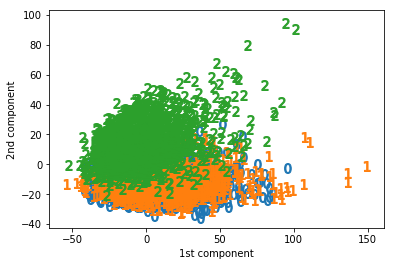

In [28]:

digits_components = pca_2d.transform(X_features)
digits_label = y

# Group images by digit
for label in range(3): # 0,1,2,3,4
    # Images of this digit
    idx = (digits_label == label)
    
    # Plot images
    plt.scatter(
        digits_components[idx, 0], digits_components[idx, 1],
        # Use digits as markers
        # Take a look at https://stackoverflow.com/a/17291915/3890306
        marker="${}$".format(label),
        s=100 # Size of each marker
    )
    
# Add legend and labels
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [31]:
cifar4_data['names']

array(['truck', 'car', 'airplane', 'ship'], dtype='<U8')

These 2 components are mostly present in cars and airplanes, 1 and 2 respectively. However, as we saw above, these 2 components only explain 25% of PVE.

### Part III

**1** 2d plot using matrix of pixels

In [34]:
X_pixels = cifar4_data['pixels']
print('Shape:',X_pixels.shape)

Shape: (5000, 3072)


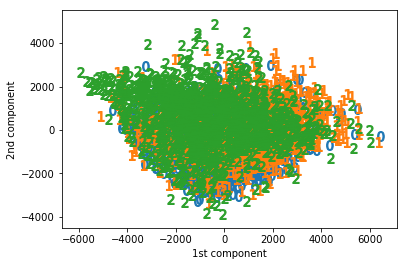

In [35]:
# Compute first two principal components
pca = PCA(n_components=2)
pca.fit(X_pixels)

digits_components = pca.transform(X_pixels)
digits_label = y

# Group images by digit
for label in range(3): # 0,1,2,3,4
    # Images of this digit
    idx = (digits_label == label)
    
    # Plot images
    plt.scatter(
        digits_components[idx, 0], digits_components[idx, 1],
        # Use digits as markers
        # Take a look at https://stackoverflow.com/a/17291915/3890306
        marker="${}$".format(label),
        s=100 # Size of each marker
    )
    
# Add legend and labels
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

These 2 components are mostly present in airplanes (label 2).